# Weather warning - Exploratory Data Analysis


### 1. Basic data description and characteristics

&nbsp; Firstly, we need to import some modules we're gonna need throughout this project.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import statsmodels.api as sm

To process the data further, we read in the next step the data into two variables (dataframes) - *measurements* and *stations*.

In [2]:
measurements = pd.read_csv('measurements.csv', sep = '\t')

stations = pd.read_csv('stations.csv', sep = '\t')

### 1.1 Basic dataframe description

&nbsp;Now we want to find out more about the dataset structure, and thus we do basic dataframe descriptions, like number of rows, attributes and their types. Firstly we describe measurements data.

In [3]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12145 entries, 0 to 12144
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEMP       12097 non-null  float64
 1   Pb         12097 non-null  float64
 2   C2H3NO5    12097 non-null  float64
 3   SO2        12097 non-null  float64
 4   CFCs       12097 non-null  float64
 5   warning    12096 non-null  float64
 6   PM10       12097 non-null  float64
 7   latitude   12145 non-null  float64
 8   O3         12097 non-null  float64
 9   PRES       12145 non-null  float64
 10  CH4        12096 non-null  float64
 11  NOx        12097 non-null  float64
 12  PAHs       12095 non-null  float64
 13  longitude  12145 non-null  float64
 14  H2CO       12096 non-null  float64
 15  CO         12097 non-null  float64
 16  PM2.5      12097 non-null  float64
 17  NH3        12097 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


As we can see, there are 12 145 records *(rows)* and 18 attributes *(columns)*. All columns are float-type, also as we can see there are a few null values in almost every column. The only columns without null values are *latitude* and *longitude*.

Because we don't want any null values and there are not a lot of records with null values - we simply drop any record containing null value.

In [4]:
measurements = measurements.dropna()

measurements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11439 entries, 0 to 12143
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEMP       11439 non-null  float64
 1   Pb         11439 non-null  float64
 2   C2H3NO5    11439 non-null  float64
 3   SO2        11439 non-null  float64
 4   CFCs       11439 non-null  float64
 5   warning    11439 non-null  float64
 6   PM10       11439 non-null  float64
 7   latitude   11439 non-null  float64
 8   O3         11439 non-null  float64
 9   PRES       11439 non-null  float64
 10  CH4        11439 non-null  float64
 11  NOx        11439 non-null  float64
 12  PAHs       11439 non-null  float64
 13  longitude  11439 non-null  float64
 14  H2CO       11439 non-null  float64
 15  CO         11439 non-null  float64
 16  PM2.5      11439 non-null  float64
 17  NH3        11439 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


After removing any null values, we can see that measurements dataset has now 11 439 records. We can now check if there are any duplicated records and if so, remove them.

In [5]:
measurements.duplicated().value_counts()

False    11265
True       174
dtype: int64

There is 174 duplicated rows, so we remove them.

In [6]:
measurements = measurements.drop_duplicates()


-----
Now we look on the stations data.

In [7]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   1034 non-null   object 
 1   latitude   1034 non-null   float64
 2   station    1034 non-null   object 
 3   QoS        1034 non-null   object 
 4   revision   1034 non-null   object 
 5   longitude  1034 non-null   float64
dtypes: float64(2), object(4)
memory usage: 48.6+ KB


In stations dataframe, there is a total of 1 034 records *(rows)* and 6 attributes *(columns)*. All the records are without any null value. There are also 4 categorical attributes of object type - *location*, *station*, *QoS* and *revision*.

### 1.2 Attributes analytics

#### 1.2.1 Measurements attributes

&nbsp;Firstly, we want to look at description of all the attributes in the dataframe - we can see basic statistic description of attributes in the table below.

In [8]:
measurements.describe()

,TEMP,Pb,C2H3NO5,SO2,CFCs,warning,PM10,latitude,O3,PRES,CH4,NOx,PAHs,longitude,H2CO,CO,PM2.5,NH3
count,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000
mean,14.937549,53.547526,0.267552,7.109789,50.100193,0.597603,7.139538,27.760529,7.889097,1125.107920,7.867589,8.175405,8.695639,9.072049,47.941441,7.109166,7.891942,7.903321
std,10.075429,13.565908,1.580181,1.909935,12.817215,0.490403,1.829538,23.625450,1.008321,43.215087,1.904142,2.028035,1.827562,75.683787,11.978826,1.609608,0.995885,0.995986
min,-28.085790,0.000000,0.000000,0.983490,0.000000,0.000000,0.000000,-54.800000,3.889960,1050.011720,1.638740,0.895030,2.088970,-156.474320,0.000000,1.602970,3.946410,3.947350
25%,8.085320,44.307610,0.049200,5.800280,41.488210,0.000000,5.891410,13.658050,7.206900,1087.781830,6.451270,6.741960,7.543270,-71.059770,39.999500,6.002630,7.233220,7.225200
50%,14.803770,53.330230,0.069460,6.968200,49.951390,1.000000,6.988650,34.864720,7.888350,1125.444580,7.729450,8.248350,8.813070,9.177020,47.765180,6.908470,7.882340,7.906430
75%,21.871480,62.775580,0.135990,8.267030,58.719800,1.000000,8.263290,44.804770,8.566530,1162.634160,9.246230,9.656120,9.946570,72.344240,56.051920,8.050750,8.567600,8.578950
max,56.840920,100.000000,100.000000,15.135050,100.000000,1.000000,15.217440,65.933810,11.969080,1199.993190,15.483560,16.614320,15.305850,171.253640,100.000000,13.303780,11.592860,11.611600


To continue with analysis of attributes firstly we clear all the data from outlier values, which are values lower/higher than product of 1.5 and interquartile range from lower/upper quartile.

In [9]:
def identify_outliers(attribute):
    lower = attribute.quantile(0.25) - 1.5 * stats.iqr(attribute)
    upper = attribute.quantile(0.75) + 1.5 * stats.iqr(attribute)
    
    return attribute[(attribute > upper) | (attribute < lower)]

for column in measurements.columns.values:
    measurements = measurements.drop(identify_outliers(measurements[column]).index)

measurements.info()
measurements.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8518 entries, 0 to 12143
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEMP       8518 non-null   float64
 1   Pb         8518 non-null   float64
 2   C2H3NO5    8518 non-null   float64
 3   SO2        8518 non-null   float64
 4   CFCs       8518 non-null   float64
 5   warning    8518 non-null   float64
 6   PM10       8518 non-null   float64
 7   latitude   8518 non-null   float64
 8   O3         8518 non-null   float64
 9   PRES       8518 non-null   float64
 10  CH4        8518 non-null   float64
 11  NOx        8518 non-null   float64
 12  PAHs       8518 non-null   float64
 13  longitude  8518 non-null   float64
 14  H2CO       8518 non-null   float64
 15  CO         8518 non-null   float64
 16  PM2.5      8518 non-null   float64
 17  NH3        8518 non-null   float64
dtypes: float64(18)
memory usage: 1.2 MB


,TEMP,Pb,C2H3NO5,SO2,CFCs,warning,PM10,latitude,O3,PRES,CH4,NOx,PAHs,longitude,H2CO,CO,PM2.5,NH3
count,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000
mean,14.859759,53.670244,0.077229,6.763361,49.960459,0.691829,6.600741,28.953492,7.884103,1125.128849,8.034622,8.433932,8.650887,7.359474,47.943650,6.775337,7.891720,7.909317
std,9.816257,13.207069,0.048124,1.543407,12.424094,0.461765,1.322594,21.962488,0.977568,43.358150,1.933903,1.912892,1.719198,73.926049,11.547965,1.273610,0.971415,0.974187
min,-12.526020,16.819300,0.000000,2.419290,15.471260,0.000000,2.797260,-33.592170,5.174340,1050.011720,2.435930,2.921600,3.949350,-156.474320,16.226060,3.312870,5.243340,5.203000
25%,8.024345,44.586290,0.046353,5.676527,41.347797,0.000000,5.679568,14.537670,7.206423,1087.739098,6.543537,7.104445,7.496218,-71.089770,40.096117,5.902513,7.239510,7.236600
50%,14.681120,53.496080,0.061450,6.734025,49.882790,1.000000,6.634985,35.066670,7.880400,1125.398670,8.012540,8.523920,8.762940,9.150130,47.822320,6.700585,7.881065,7.908250
75%,21.780527,62.748875,0.090002,7.805782,58.501550,1.000000,7.579745,45.350000,8.558385,1162.960777,9.510125,9.823762,9.868845,70.911060,55.937602,7.574085,8.558248,8.580695
max,42.455450,90.183150,0.265470,11.200450,84.626480,1.000000,9.214690,65.933810,10.608730,1199.993190,13.887390,13.869800,13.325060,168.313660,80.043420,10.280860,10.548840,10.600760


After removal of outliers, there are 8 518 records of data left.

Nextly, we want to analyse more deeply temperature attribute *(TEMP)*. As we can see in the table, average measured temperature is *14.86 &deg;C*, minimal measured temperature is *-12.52 &deg;C*, and the maximum one *42.46 &deg;C*. Standard deviation of temperature makes *9.81 &deg;C*.

In [10]:
measurements['TEMP'].describe()

count    8518.000000
mean       14.859759
std         9.816257
min       -12.526020
25%         8.024345
50%        14.681120
75%        21.780527
max        42.455450
Name: TEMP, dtype: float64

We want to see distribution in a graph structure and therefore we make boxplot and histogram for this attribute.

[Text(0.5, 0, 'Temperature (°C)')]

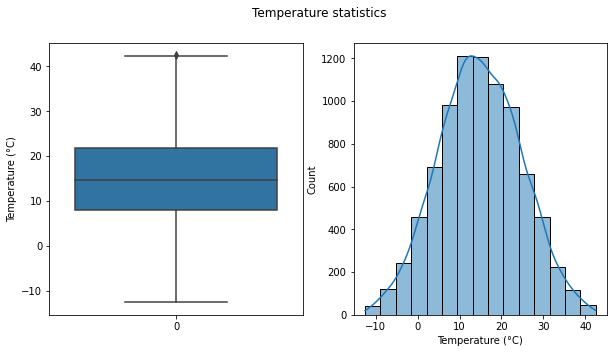

In [11]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.suptitle("Temperature statistics")


sns.boxplot(data = measurements['TEMP'], ax = axes[0]).set(ylabel = "Temperature (°C)")
sns.histplot(data = measurements['TEMP'], kde = True, ax = axes[1], bins = 15).set(xlabel = "Temperature (°C)")

Based on the boxplot we can see that we got rid of the outliers ( points on upper side of the plot are new outliers ). From the histogram and KDE curve we can see that distribution of data is mostly symmetrical.

Further, we analyse atmospheric pressure attribute *(PRES)*. Average measured atmospheric pressure makes *1125.13 hPa*, minimum was *1050.01 hPa* and maximum was *1199.99 hPa*. Standard deviation of pressure measurements is *43.36 hPa*.

In [12]:
measurements['PRES'].describe()

count    8518.000000
mean     1125.128849
std        43.358150
min      1050.011720
25%      1087.739098
50%      1125.398670
75%      1162.960777
max      1199.993190
Name: PRES, dtype: float64

Again, we use boxplot and histogram for visualising the data.

[Text(0.5, 0, 'Atmospheric pressure (hPA)')]

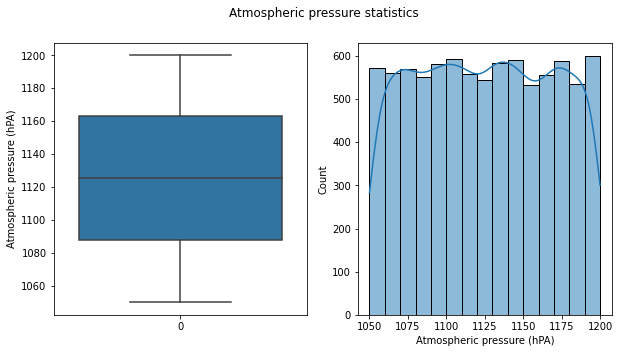

In [13]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.suptitle("Atmospheric pressure statistics")


sns.boxplot(data = measurements['PRES'], ax = axes[0]).set(ylabel = "Atmospheric pressure (hPA)")
sns.histplot(data = measurements['PRES'], kde = True, ax = axes[1], bins = 15).set(xlabel = "Atmospheric pressure (hPA)")

Boxplot shows none new outliers for atmospheric pressure data, however distribution shown on histogram is a very curvy function as there are several local maximums and minimums. Curve does look symmetrical though.

We decided to analyse few more attributes which looks to us important - *NOx (nitrogen oxides)*, *CO (carbon monoxyde emissions)*.

From the table below we can see that average measures nitrogen oxides in the atmosphere makes *8.43 µg/m3*, maximum measured was *13.87 µg/m3*, minimum of *2.92 µg/m3* with the standard deviation of *1.91 µg/m3*.

In [14]:
measurements['NOx'].describe()

count    8518.000000
mean        8.433932
std         1.912892
min         2.921600
25%         7.104445
50%         8.523920
75%         9.823762
max        13.869800
Name: NOx, dtype: float64

Again, we will analyse distribution with the use of boxplot and histogram.

[Text(0.5, 0, 'Nitrogen oxides (µg/m3)')]

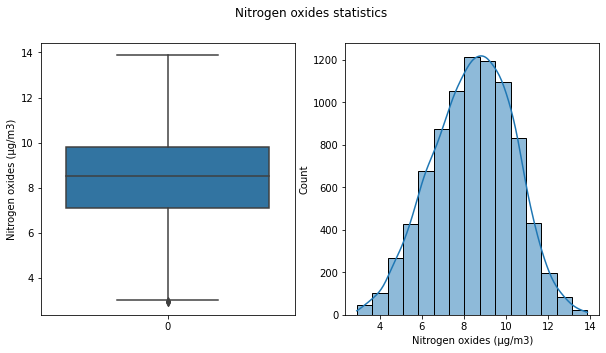

In [15]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.suptitle("Nitrogen oxides statistics")


sns.boxplot(data = measurements['NOx'], ax = axes[0]).set(ylabel = "Nitrogen oxides (µg/m3)")
sns.histplot(data = measurements['NOx'], kde = True, ax = axes[1], bins = 15).set(xlabel = "Nitrogen oxides (µg/m3)")

Boxplot on the left shows us that there is very little of new outliers after removal of old ones. From the histogram and distribution curve we found out that these data have a little negative skewness however data still might be almost symmetrical.

We apply analogical process for *CO* attribute.

Average measured carbon monoxyde emissions were *6.77 µg/m3*, minimum *3.31 µg/m3*, maximum *10.28 µg/m3* and standard deviation of *1.27 µg/m3*.

In [16]:
measurements['CO'].describe()

count    8518.000000
mean        6.775337
std         1.273610
min         3.312870
25%         5.902513
50%         6.700585
75%         7.574085
max        10.280860
Name: CO, dtype: float64

We use boxplot and histogram visualization again.

[Text(0.5, 0, 'Carbon monoxyde (µg/m3) ')]

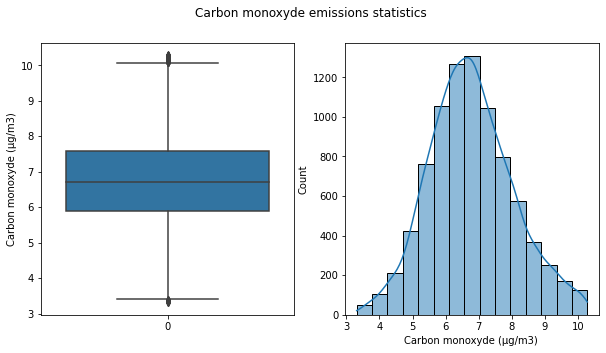

In [17]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.suptitle("Carbon monoxyde emissions statistics")


sns.boxplot(data = measurements['CO'], ax = axes[0]).set(ylabel = "Carbon monoxyde (µg/m3)")
sns.histplot(data = measurements['CO'], kde = True, ax = axes[1], bins = 15).set(xlabel = "Carbon monoxyde (µg/m3) ")

From the boxplot we can see that there are few more new outliers. Distribution curve on the right shows positive skewness but again, data are more or less symmetrical.

#### 1.2.2 Stations attributes

Stations dataframe consists mainly of categorical attributes.

As first, we decided to look at the *location* attribute and its unique values.

In [18]:
sorted(stations['location'].unique())

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Conakry',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Johannesburg',
 'Africa/Kampala',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Maputo',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Niamey',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Windhoek',
 'America/Argentina/Buenos_Aires',
 'America/Argentina/Cordoba',
 'America/Argentina/Tucuman',
 'America/Argentina/Ushuaia',
 'America/Bahia',
 'America/Bogota',
 'America/Boise',
 'America/Caracas',
 'America/Chicago',
 'America/Costa_Rica',
 'America/Cuiaba',
 'America/Denver',
 'America/Detroit',
 'America/Edmonton',
 'America/El_Salvador',
 'America/Guatemala',
 'America/Guayaquil'

In [19]:
stations['location'].value_counts().sort_index().sort_values(ascending = False)

America/New_York    88
Asia/Kolkata        64
America/Chicago     50
Europe/Berlin       48
Europe/London       40
                    ..
Asia/Irkutsk         1
Asia/Phnom_Penh      1
Asia/Yakutsk         1
Asia/Yerevan         1
Pacific/Honolulu     1
Name: location, Length: 154, dtype: int64

As we can see, there are total of 154 unique locations. Most of the records come from New York in America. There are however locations with only 1 record.

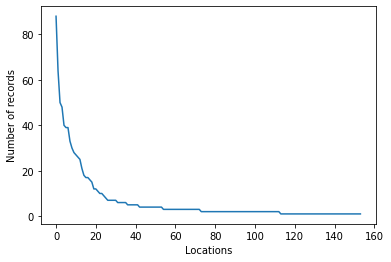

In [20]:
sns.lineplot(stations['location'].value_counts().values).set(xlabel = "Locations", ylabel = "Number of records")
plt.show()

This linegraph shows us that most of locations have only few records and there are few locations with a lot of records.

Now, we shall analyze the 
station attribute.

In [21]:
sorted(stations['station'].unique())

["'Ali Sabieh",
 'Aberdeen',
 'Acaponeta',
 'Acworth',
 'Ada',
 'Adliswil',
 'Adra',
 'Afragola',
 'Agrigento',
 'Aguadilla',
 'Aguilares',
 'Aistala',
 'Ajaccio',
 'Ajdabiya',
 'Aklera',
 'Aksaray',
 'Alatyr‚Äô',
 'Albstadt',
 'Aleshtar',
 'Alexandria',
 'Alfenas',
 'Alipur',
 'Aloha',
 'Alytus',
 'Ambatondrazaka',
 'American Canyon',
 'Amreli',
 'Andijon',
 'Antanifotsy',
 'Aracaju',
 'Arba Minch',
 'Arles',
 'Aschaffenburg',
 'Ataq',
 'Athlone',
 'Aykhal',
 'Azrou',
 'Baki',
 'Balikpapan',
 'Baliuag',
 'Barbil',
 'Barinas',
 'Barmbek-Nord',
 'Barnet',
 'Barracas',
 'Batu Feringgi',
 'Baulkham Hills',
 'Bavly',
 'Baza',
 'Beaconsfield',
 'Belle Glade',
 'Belper',
 'Beni',
 'Beni Douala',
 'Beni Khiar',
 'Bensheim',
 'Beryozovsky',
 'Betamcherla',
 'Beveren',
 'Bhayandar',
 'Bhuban',
 'Binnish',
 'Bisceglie',
 'Bobigny',
 'Bogoroditsk',
 'Bogovinje',
 'Boli',
 'Bon Air',
 'Boo',
 'Boston',
 'Bothell West',
 'Boumerdas',
 'Bourbonnais',
 'Boyeros',
 'Brazzaville',
 'Brenham',
 'Brentwo

In [22]:
len(stations['station'].unique())

640

Station attribute is for identifying weather stations at different locations. In this dataset, there is a total of 640 unique stations.

Now, we're gonna look up QoS attribute.

In [23]:
sorted(stations['QoS'].unique())

['accep',
 'acceptable',
 'average',
 'building',
 'excellent',
 'good',
 'maintenance',
 'maitennce']

In this attribute we can see a problem that there are more categories with the same meaning - just misspelled or abbreviated. As fixation of this problem, we rename *accep* values into *acceptable* and *maitennce* into *maintenance*.

In [24]:
# replacing misspelled 
stations['QoS'] = stations['QoS'].replace('accep', 'acceptable')
stations['QoS'] = stations['QoS'].replace('maitennce', 'maintenance')

# number of occurences of a specific value
stations['QoS'].value_counts()

average        225
excellent      225
good           209
acceptable     195
maintenance    100
building        80
Name: QoS, dtype: int64

After fixing the attribute data, we generated occurence table of values. We can see that most of the stations are in the *average* or *excellent* quality, followed by *good* stations. On the other end, least of the stations are in the *building* state. 

To illustrate proportions of these values we create a piechart.

<AxesSubplot: ylabel='QoS'>

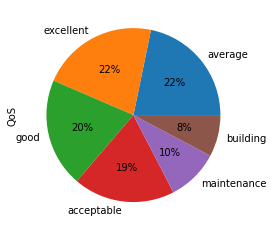

In [25]:
stations['QoS'].value_counts().plot.pie(autopct = '%.0f%%')

Lastly, we'll look more into *revision* attribute.

In [26]:
sorted(stations['revision'].unique())

['01 Aug 2017',
 '01 Dec 2014',
 '01 Jan 2014',
 '01 Mar 2015',
 '01 May 2014',
 '01 May 2017',
 '01 Oct 2019',
 '01 Sep 2019',
 '01/02/2021, 00:00:00',
 '01/03/2016, 00:00:00',
 '01/04/2020, 00:00:00',
 '01/08/2019, 00:00:00',
 '01/12/2021, 00:00:00',
 '01/15/2018, 00:00:00',
 '01/17/2014, 00:00:00',
 '01/18/2017, 00:00:00',
 '01/19/2019, 00:00:00',
 '01/23/2013, 00:00:00',
 '01/24/2016, 00:00:00',
 '01/24/2021, 00:00:00',
 '01/27/2019, 00:00:00',
 '01/28/2013, 00:00:00',
 '01/29/2021, 00:00:00',
 '02 Apr 2015',
 '02 Aug 2022',
 '02 Feb 2022',
 '02 Jan 2014',
 '02 Jan 2022',
 '02 Jul 2015',
 '02 Jun 2018',
 '02 May 2013',
 '02/01/2018, 00:00:00',
 '02/02/2013, 00:00:00',
 '02/04/2014, 00:00:00',
 '02/04/2017, 00:00:00',
 '02/06/2014, 00:00:00',
 '02/07/2015, 00:00:00',
 '02/08/2022, 00:00:00',
 '02/09/2013, 00:00:00',
 '02/09/2017, 00:00:00',
 '02/09/2022, 00:00:00',
 '02/11/2016, 00:00:00',
 '02/12/2020, 00:00:00',
 '02/14/2016, 00:00:00',
 '02/14/2018, 00:00:00',
 '02/15/2014, 00:00

From the data shown above we can see that there is used a lot of different timestamps, like 'YYYY/MM/DD', 'MM/DD/YYYY HH:MM:SS', 'DD Month YYYY', 'YYYY-MM-DD'. In the next step we fix these data by transforming all other formats to format YYYY-MM-DD. We used regex for each type of timestamp and then map with anonymous function which fixes all the timestamps that match the given regular expression.

In [27]:
# 'YYYY/MM/DD' fix
stations['revision'] = stations['revision'].map(lambda date: re.sub(pattern = r"^\d{4}\/\d{2}\/\d{2}$",
                                                                    repl = date.replace('/', '-'), 
                                                                    string = date))
# 'MM/DD/YYYY, HH:MM:SS' fix
stations['revision'] = stations['revision'].map(lambda date: re.sub(pattern = r"^\d{2}\/\d{2}\/\d{4}, \d{2}:\d{2}:\d{2}$", 
                                                                    repl = date[6:10] + '-' + date[0:2] + '-' + date[3:5], 
                                                                    string = date))
# dictionary for mapping months name into its number
months = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# 'DD Month YYYY' fix
stations['revision'] = stations['revision'].map(lambda date: re.sub(pattern = r"^\d{2} [A-Z][a-z]{2} \d{4}$", 
                                                                    repl = date[7:] + '-' + str(months.get(date[3:6])) + '-' + date[0:2], 
                                                                    string = date))

In [28]:
sorted(stations['revision'].unique())


['2012-09-29',
 '2012-10-07',
 '2012-10-08',
 '2012-10-13',
 '2012-10-16',
 '2012-10-23',
 '2012-10-24',
 '2012-11-01',
 '2012-11-04',
 '2012-11-10',
 '2012-11-11',
 '2012-11-16',
 '2012-11-18',
 '2012-12-09',
 '2012-12-11',
 '2012-12-16',
 '2012-12-22',
 '2012-12-24',
 '2012-12-27',
 '2013-01-12',
 '2013-01-18',
 '2013-01-21',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-27',
 '2013-01-28',
 '2013-02-02',
 '2013-02-05',
 '2013-02-06',
 '2013-02-09',
 '2013-02-10',
 '2013-02-12',
 '2013-02-16',
 '2013-02-18',
 '2013-02-28',
 '2013-03-09',
 '2013-03-10',
 '2013-03-12',
 '2013-03-18',
 '2013-03-19',
 '2013-03-26',
 '2013-03-31',
 '2013-04-05',
 '2013-04-08',
 '2013-04-12',
 '2013-04-14',
 '2013-04-15',
 '2013-04-16',
 '2013-04-18',
 '2013-04-20',
 '2013-04-25',
 '2013-04-27',
 '2013-05-02',
 '2013-05-11',
 '2013-05-14',
 '2013-05-16',
 '2013-05-17',
 '2013-05-18',
 '2013-05-20',
 '2013-05-25',
 '2013-05-31',
 '2013-06-02',
 '2013-06-06',
 '2013-06-07',
 '2013-06-12',
 '2013-06-

As we can see, now all the timestamps have the same format. After sorting we can also see, that there are revisions from 29. september 2012 to 27. september 2022.

In [29]:
stations['revision'].value_counts()

2019-12-13    3
2013-02-09    3
2017-05-27    3
2017-06-05    3
2016-06-27    3
             ..
2022-02-08    1
2020-10-20    1
2021-11-24    1
2014-12-31    1
2013-02-02    1
Name: revision, Length: 904, dtype: int64

When we make occurence table of values, it is also shown that there are some dates more than once.

Further we would want to analyse where are the stations located, however *location* attribute is a concatenation of two values using '/' as separator. To investigate further we decided to split this column into two seperate columns - *region* (part before '/') and *locality* (part after '/').

In [30]:
# make a new columns by splitting locality attribute
stations[['region', 'locality']] = stations['location'].str.split('/', n = 1, expand = True)

# drop the old column
stations.drop('location', inplace = True, axis = 1)
stations

,latitude,station,QoS,revision,longitude,region,locality
0,13.65805,Paoy Paet,average,2018-10-19,102.56365,Asia,Phnom_Penh
1,49.97704,Aschaffenburg,good,2021-03-19,9.15214,Europe,Berlin
2,2.21390,Kampung Ayer Molek,acceptable,2019-06-21,102.32780,Asia,Kuala_Lumpur
3,-28.24000,Imbituba,maintenance,2019-05-31,-48.67028,America,Sao_Paulo
4,-21.44236,Tonota,acceptable,2018-09-26,27.46153,Africa,Gaborone
...,...,...,...,...,...,...,...
1029,17.30858,Kyaikto,maintenance,2013-01-27,97.01124,Asia,Yangon
1030,13.70727,Mirriah,average,2014-02-04,9.15013,Africa,Niamey
1031,50.82709,Wesseling,acceptable,2020-10-02,6.97470,Europe,Berlin
1032,46.75451,Nova Kakhovka,average,2014-02-21,33.34864,Europe,Kiev


<AxesSubplot: xlabel='region', ylabel='count'>

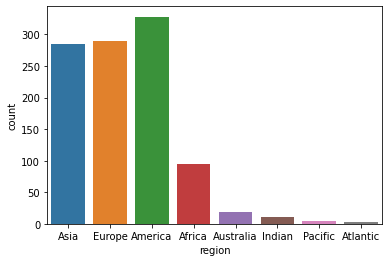

In [31]:
sns.countplot(x = 'region', data = stations)

From the countplot above we can see that most of the stations are located in the America region, followed by European and Asian region.

### 1.3 Bivariate analysis

&nbsp;To find out more about relationships between different attributes we make a heatmap based on correlations between these attributes. 

<AxesSubplot: >

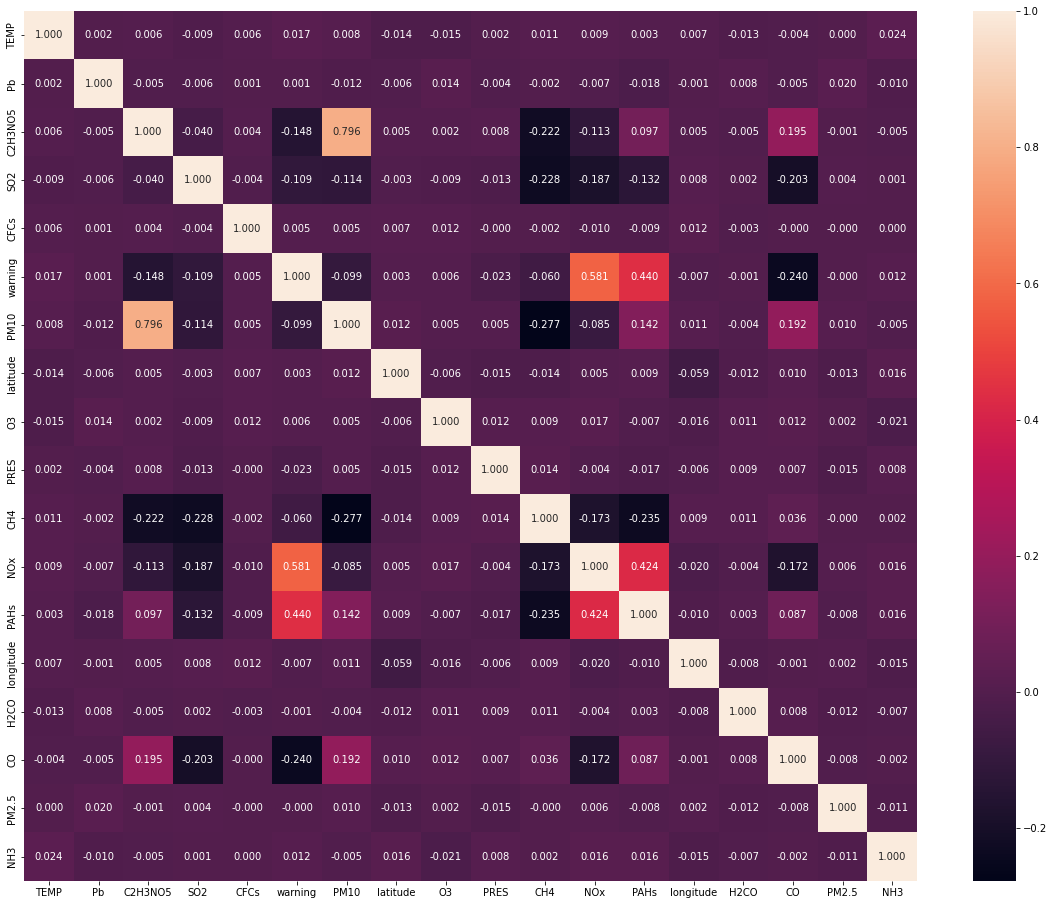

In [32]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(measurements.corr(), ax = ax, annot = True, fmt = ".3f")

Based on this heatmap we can say that the strongest found correlation is positive correlation between *PM10* and *C2H3NO5* attributes (corr = 0.796), followed by moderate positive correlation of *NOx* and *warning* indicator (corr = 0.581), next moderate positive correlation between *PAHs* and *warning* indicator (corr = 0.440) and again moderate positive correlation of *PAHs* and *NOX* (corr = 0.424). 

Attributes *TEMP*, *Pb*, *CFCs*, *latitude*, *O3*, *PRES*, *longitude*, *H2CO*, *PM2.5* and *NH3* have almost no correlation with any of the other attributes.

There are also next weak correlations (corr > 0.2):
- *CH4* and *C2H3NO5* (corr = -0.222)
- *CH4* and *SO2* (corr = -0.228)
- *CH4* and *PM10* (corr = -0.277)
- *CH4* and *PAHs* (corr = -0.235)
- *CO* and *SO2* (corr = -0.203)
- *CO and *warning* (corr = -0.240)

According to those correlations we will analyse further attributes which have at least 1 weak correlation with any different attribute:
- *C2H3NO5*
- *SO2*
- *warning*
- *PM10*
- *CH4*
- *NOx*
- *PAHs*
- *CO*

In the next step we make a pairplot between all these attributes with *warning* indicator as a hue. 

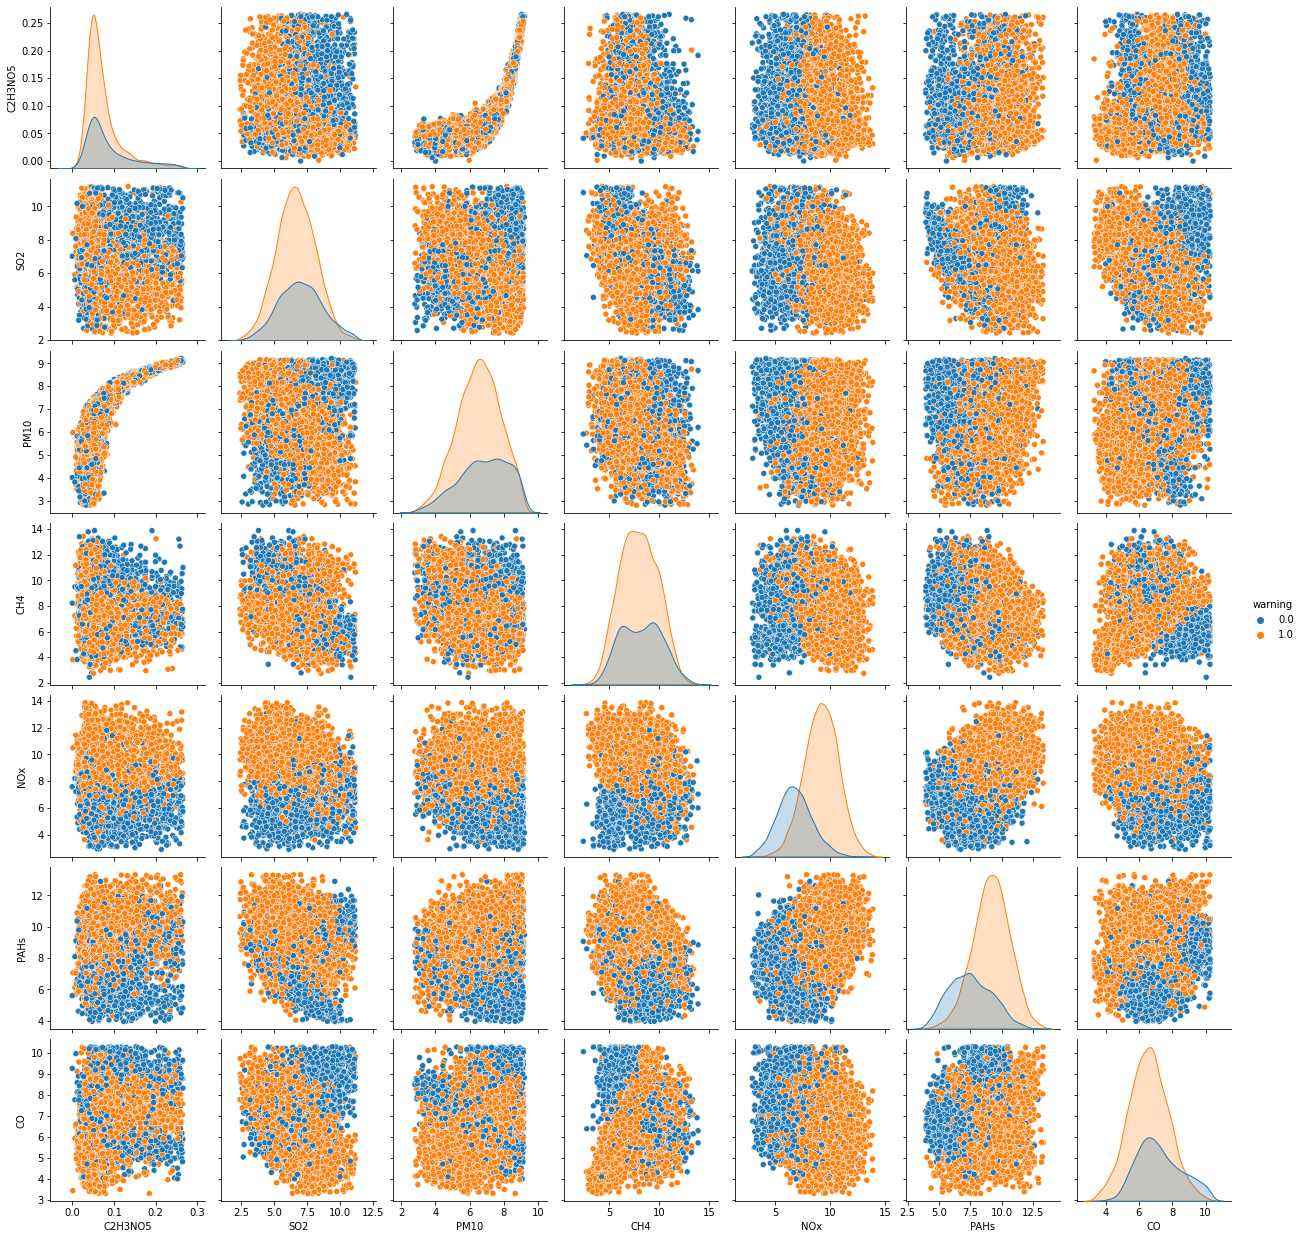

In [33]:
sns.pairplot(measurements, vars = ['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO'],
             hue="warning", diag_kind="kde")

In this pairplot we can see that the strongest found correlation between attributes *C2H3NO5* and *PM10* has the best looking pairplot. 

To look at these relationship we can make a regplot with fitted regression. As we can see from the graph, the relationship won't be described precisely by linear regression as it is more curve looking.

<AxesSubplot: xlabel='C2H3NO5', ylabel='PM10'>

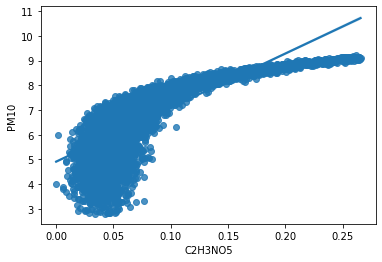

In [34]:
sns.regplot(x = measurements['C2H3NO5'], y = measurements['PM10'])

[Text(0.5, 0, 'Particulate Matter (µg/m3)')]

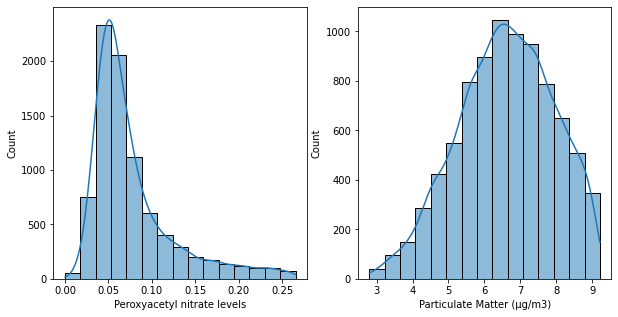

In [35]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)


sns.histplot(data = measurements['C2H3NO5'],kde = True, ax = axes[0], bins = 15).set(xlabel = "Peroxyacetyl nitrate levels")
sns.histplot(data = measurements['PM10'], kde = True, ax = axes[1], bins = 15).set(xlabel = "Particulate Matter (µg/m3)")

Now we want to analyze relationships we found with the *warning* indicator.

From the heatmap we found moderate positive correlation between *warning* indicator and *NOx* attribute, in the next step from the pairplots with considered *warning* indicator we can see that plots regarded to *NOx* have most of the *warning* = 1 above *NOx* value of 7.

In [36]:
measurements[measurements['NOx'] > 7].warning.value_counts()

1.0    5405
0.0    1112
Name: warning, dtype: int64

We counted number of records with *warning* equal to 1 and 0 and *NOx* value above 8 - 79.43% of the records had warning equal to 1 and 20.57% had warning equal to 0. Later we will test this relation more with hypothesis later.


Heatmap also shown moderate correlation between *warning* indicator and *PAHs*. After looking at the pairplots there is also similar trend where with the decreasing of value *PAHs* the number of records with *warning* indicator of 1 also decreases. We can see dramatic change around *PAHs* value ~ 7.

In [37]:
measurements[measurements['PAHs'] > 7].warning.value_counts()

1.0    5442
0.0    1556
Name: warning, dtype: int64

We again counted number of records with *warning* equal to 1 and 0 and found that there 28.59% of records with *PAHs* above value 7 have warning equal to 1 and the remaining 71.41% equal to 0.

[Text(0.5, 0, 'Polycyclic aromatic hydrocarbons (µg/m3)')]

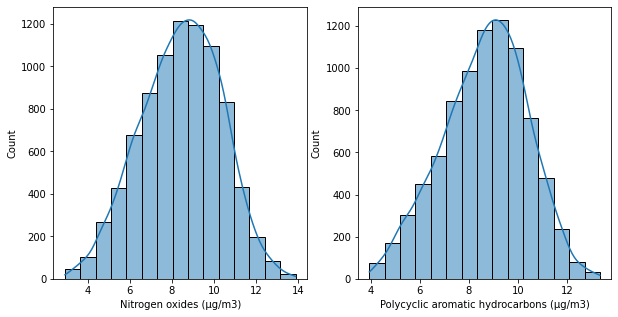

In [38]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)


sns.histplot(data = measurements['NOx'], kde = True, ax = axes[0], bins = 15).set(xlabel = "Nitrogen oxides (µg/m3)")
sns.histplot(data = measurements['PAHs'], kde = True, ax = axes[1], bins = 15).set(xlabel = "Polycyclic aromatic hydrocarbons (µg/m3)")

Histograms shown us that distribution of both of these attributes are similar, there is a little negative skewness and the data are mostly symmetrical.

c:\users\majoa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
c:\users\majoa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='PAHs', ylabel='Count'>

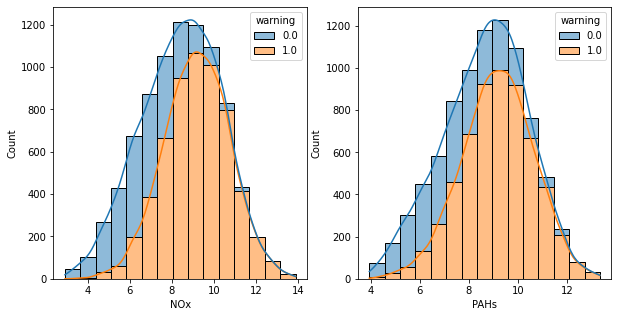

In [39]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.histplot(data = measurements, ax = axes[0], stat = "count", multiple = "stack",
             x = "NOx", bins = 15, hue = "warning", legend = True, kde = True)

sns.histplot(data = measurements, ax = axes[1], stat = "count", multiple = "stack",
             x = "PAHs", bins = 15, hue = "warning", legend = True, kde = True)

We made next histograms shown with the proportions od data where *warning* is equal to 0 and 1. We can see that with increasing *NOx* and *PAHs* values number of records with warning equal to 1 increases too.

### 2. Problems with datasets

#### 2.1 Measurements dataset

During our last steps we already encountered some problems with the datasets. Firstly, we removed all the null values and duplicated records. After that, we removed all the records with any outlier. We removed the records because the amount of outliers wasn't high. Highest number of outliers were found in *C2H3NO5* attribute, however we decided even to remove these as it did not make even 10% of all records. Most of the problems were therefore already fixed in the previous part of the project.

As a last change, we want to rearrange the columns for better readability.

In [40]:
measurements = measurements[['latitude', 'longitude', 'warning', 'TEMP', 'PRES', 'PM10', 'PM2.5',
                             'Pb', 'C2H3NO5', 'SO2', 'CFCs', 'O3', 'CH4', 'NOx', 'PAHs', 'H2CO',
                             'CO', 'NH3']]

measurements

,latitude,longitude,warning,TEMP,PRES,PM10,PM2.5,Pb,C2H3NO5,SO2,CFCs,O3,CH4,NOx,PAHs,H2CO,CO,NH3
0,8.35122,-62.64102,1.0,11.63681,1051.93040,4.17615,7.88810,59.04929,0.04992,8.15174,33.76361,8.01685,12.09764,5.42988,8.36734,75.73743,6.63032,7.24165
1,38.06084,-97.92977,1.0,29.61423,1193.67200,6.97589,7.84346,57.37654,0.08302,6.85331,46.94613,8.48665,7.78226,8.77385,9.18997,45.75960,6.72084,8.38619
2,-8.05389,-34.88111,1.0,22.38966,1103.81702,7.15149,8.32372,61.27853,0.07044,7.77907,52.72148,8.86664,5.94096,7.58559,8.18342,52.68559,5.32123,9.59674
3,35.74788,-95.36969,1.0,23.93475,1160.81796,8.77098,7.87748,51.19713,0.19101,5.61192,30.15729,7.13248,5.94754,9.78942,11.52139,46.45811,7.00019,8.57713
5,23.73333,114.68333,1.0,12.53107,1120.60231,4.90937,9.44864,58.85453,0.03560,6.32751,64.67578,7.94877,11.60489,9.11119,8.75665,56.00213,6.78171,8.30820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12135,4.94273,15.87735,1.0,14.29331,1158.57632,8.17741,10.04003,73.51009,0.14787,5.62748,56.25847,8.14015,9.89341,5.29814,5.69879,48.40196,8.78723,8.16073
12138,38.37255,34.02537,0.0,19.84846,1064.05127,8.71890,6.41601,45.76606,0.18855,8.98685,33.76863,9.24311,5.00713,4.23396,8.29604,31.89878,9.39525,6.88122
12139,13.56667,-15.60000,1.0,38.44682,1051.41587,7.43413,8.76004,65.32426,0.07008,5.92346,56.19677,6.43020,8.42625,5.02474,7.09002,36.63710,6.08212,6.48448
12142,41.91738,3.16310,0.0,22.66901,1159.24970,7.47681,7.21536,49.32991,0.07646,7.34128,51.94318,7.36530,9.55866,7.49798,5.67403,56.87669,6.35085,6.97703


#### 2.2 Stations dataset

By doing basic description of this dataframe we could see there are no null values in this dataframe. There were no duplicates either. However, when we inspected in the past attribute *QoS* there were multiple misspelled values which we replaced to mean to same. Next we split *location* attribute into 2 separate columns *region* and *location*. There was also a problem with different formats of timestamps, which we corrected to uniform format in the previous part of the project too.


Lastly, we rearrange the columns for better readability.

In [41]:
stations = stations[['latitude', 'longitude', 'region', 'locality', 'station', 'QoS', 'revision']]
stations

,latitude,longitude,region,locality,station,QoS,revision
0,13.65805,102.56365,Asia,Phnom_Penh,Paoy Paet,average,2018-10-19
1,49.97704,9.15214,Europe,Berlin,Aschaffenburg,good,2021-03-19
2,2.21390,102.32780,Asia,Kuala_Lumpur,Kampung Ayer Molek,acceptable,2019-06-21
3,-28.24000,-48.67028,America,Sao_Paulo,Imbituba,maintenance,2019-05-31
4,-21.44236,27.46153,Africa,Gaborone,Tonota,acceptable,2018-09-26
...,...,...,...,...,...,...,...
1029,17.30858,97.01124,Asia,Yangon,Kyaikto,maintenance,2013-01-27
1030,13.70727,9.15013,Africa,Niamey,Mirriah,average,2014-02-04
1031,50.82709,6.97470,Europe,Berlin,Wesseling,acceptable,2020-10-02
1032,46.75451,33.34864,Europe,Kiev,Nova Kakhovka,average,2014-02-21


Now we are going to merge those dataframes. However, when we look at the stations table there are multiple records with the same station but different QoS. Because we do not know when the data from measurements dataframe were measured, we will not take QoS into consideration. Therefore our goal of merging those two dataframes is to bring *region*, *locality* and *station* to the measurement records.

In [42]:
# merge of the measurements and stations dataframes 
merged = pd.merge(measurements, stations, how = 'left', left_on = ['latitude', 'longitude'], right_on = ['latitude', 'longitude'])

# removal of QoS and revision columns
merged.drop(['QoS', 'revision'], inplace = True, axis = 1)

# deletion of duplicated values
merged.drop_duplicates(inplace = True)

# deletion of null values
merged.dropna(inplace = True)

# index resetting
merged.reset_index(drop=True, inplace=True)

# rearrange of columns
merged = merged[[ 'latitude', 'longitude', 'region', 'locality', 'station', 'warning', 'TEMP', 'PRES', 'PM10', 'PM2.5',
                'Pb', 'C2H3NO5', 'SO2', 'CFCs', 'O3', 'CH4', 'NOx', 'PAHs', 'H2CO', 'CO', 'NH3']]
merged

,latitude,longitude,region,locality,station,warning,TEMP,PRES,PM10,PM2.5,...,C2H3NO5,SO2,CFCs,O3,CH4,NOx,PAHs,H2CO,CO,NH3
0,8.35122,-62.64102,America,Caracas,Ciudad Guayana,1.0,11.63681,1051.93040,4.17615,7.88810,...,0.04992,8.15174,33.76361,8.01685,12.09764,5.42988,8.36734,75.73743,6.63032,7.24165
1,38.06084,-97.92977,America,Chicago,Hutchinson,1.0,29.61423,1193.67200,6.97589,7.84346,...,0.08302,6.85331,46.94613,8.48665,7.78226,8.77385,9.18997,45.75960,6.72084,8.38619
2,-8.05389,-34.88111,America,Recife,Recife,1.0,22.38966,1103.81702,7.15149,8.32372,...,0.07044,7.77907,52.72148,8.86664,5.94096,7.58559,8.18342,52.68559,5.32123,9.59674
3,35.74788,-95.36969,America,Chicago,Muskogee,1.0,23.93475,1160.81796,8.77098,7.87748,...,0.19101,5.61192,30.15729,7.13248,5.94754,9.78942,11.52139,46.45811,7.00019,8.57713
4,23.73333,114.68333,Asia,Shanghai,Heyuan,1.0,12.53107,1120.60231,4.90937,9.44864,...,0.03560,6.32751,64.67578,7.94877,11.60489,9.11119,8.75665,56.00213,6.78171,8.30820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,4.94273,15.87735,Africa,Bangui,Carnot,1.0,14.29331,1158.57632,8.17741,10.04003,...,0.14787,5.62748,56.25847,8.14015,9.89341,5.29814,5.69879,48.40196,8.78723,8.16073
8514,38.37255,34.02537,Europe,Istanbul,Aksaray,0.0,19.84846,1064.05127,8.71890,6.41601,...,0.18855,8.98685,33.76863,9.24311,5.00713,4.23396,8.29604,31.89878,9.39525,6.88122
8515,13.56667,-15.60000,Africa,Banjul,Farafenni,1.0,38.44682,1051.41587,7.43413,8.76004,...,0.07008,5.92346,56.19677,6.43020,8.42625,5.02474,7.09002,36.63710,6.08212,6.48448
8516,41.91738,3.16310,Europe,Madrid,Palafrugell,0.0,22.66901,1159.24970,7.47681,7.21536,...,0.07646,7.34128,51.94318,7.36530,9.55866,7.49798,5.67403,56.87669,6.35085,6.97703


### 3. Hypothesis testing

#### 3.1 First hypothesis

**H<sub>0</sub>: If *NOx* value is greater than 7 (µg/m3), warning indicator is probably  equal to 1.**

**H<sub>A</sub>: If *NOx* value is greater than 7 (µg/m3), it has no effect on warning indicator**


c:\users\majoa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\majoa\AppData\Local\Temp\ipykernel_16700\976994822.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


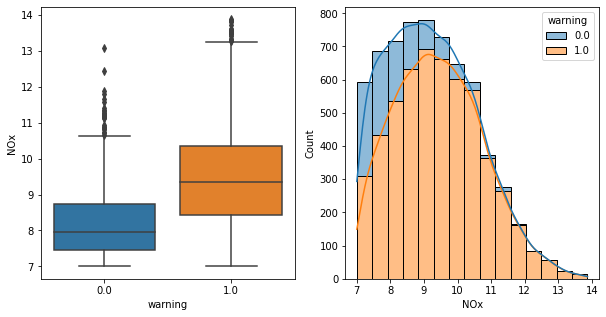

In [43]:
NOx7 = merged[merged['NOx'] > 7]


fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.boxplot(NOx7, y = 'NOx', x = 'warning', ax = axes[0])

sns.histplot(data = NOx7, ax = axes[1], stat = "count", multiple = "stack",
             x = "NOx", bins = 15, hue = "warning", legend = True, kde = True)

fig.show()

From the graphs we can see there are some outliers values, however because we already did remove outliers in previous steps of the project we leave these values as are.

To find out more about relationship between these attributes we now split *NOx* values greater than 7 into 2 subsets based on their *warning* indicator.

In [44]:
NOx7_warning0 = NOx7[NOx7['warning'] == 0]['NOx']

NOx7_warning0.describe()

count    1112.000000
mean        8.216826
std         0.997257
min         7.001130
25%         7.452953
50%         7.964815
75%         8.731082
max        13.066240
Name: NOx, dtype: float64

In [45]:
NOx7_warning1 = NOx7[NOx7['warning'] == 1]['NOx']

NOx7_warning1.describe()

count    5405.000000
mean        9.439909
std         1.324698
min         7.000160
25%         8.420560
50%         9.360860
75%        10.347260
max        13.869800
Name: NOx, dtype: float64

As a next step we make QQ-plots to visualize distributions of these subsets.

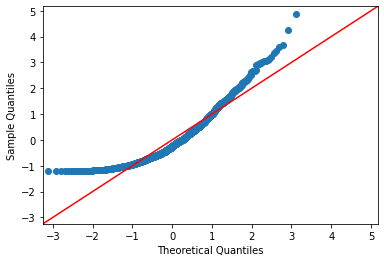

In [46]:
NOx7_warning0_qq = sm.ProbPlot(NOx7_warning0, fit = True).qqplot(line = '45')

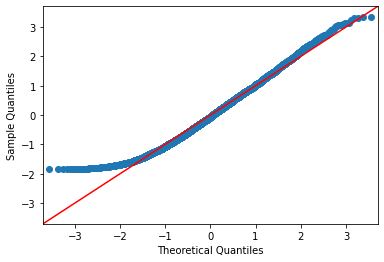

In [47]:
NOx7_warning1_qq = sm.ProbPlot(NOx7_warning1, fit = True).qqplot(line = '45')

QQ plot shown us that data probably do not come from  normal distribution, however to be sure we will conduct a **Shapiro-Wilk test of normality**.

In [48]:
stats.shapiro(NOx7_warning0)

ShapiroResult(statistic=0.9021044373512268, pvalue=4.56775393360166e-26)

P-value of this subset is lower than $\alpha$ < 0.05 and therefore we reject *H0* hypothesis of Shapiro-Wilk test that data come from normal distribution. Because of this, we can skip testing of distribution on 2nd subset and move directly to hypothesis testing with non-parametric **Mann-Whitney U test**.

In [49]:
stats.mannwhitneyu(NOx7_warning0, NOx7_warning1)

MannwhitneyuResult(statistic=1362129.0, pvalue=3.76963314474014e-182)

P-value of Mann-Whitney U test is lower than $\alpha$ < 0.05 and therefore we reject H<sub>0</sub> of Mann-Whitney U test and thus we cannot reject our **H<sub>0</sub>**. Based on this result we can assume that *NOx* values do somehow affect *warning* indicator.

#### 3.2 Second hypothesis

**H<sub>0</sub>: There is significant difference in warning indicator values between PAHs values from intervals \[0, 6), \[6, 10) and [10, $\infty$)**<br>
**H<sub>A</sub>: There is no significant difference in warning indicator values based on PAHs values.**

Firstly we make 3 subsets for data from these intervals.

In [50]:
PAHs0_6 = merged[(merged['PAHs'] >= 0) & (merged['PAHs'] < 6)][['PAHs', 'warning']]

PAHs0_6.describe()

,PAHs,warning
count,662.000000,662.000000
mean,5.294753,0.185801
std,0.507220,0.389240
min,3.949350,0.000000
25%,4.956220,0.000000
50%,5.385785,0.000000
75%,5.712740,0.000000
max,5.997760,1.000000


In [51]:
PAHs6_10 = merged[(merged['PAHs'] >= 6) & (merged['PAHs'] < 10)][['PAHs', 'warning']]

PAHs6_10.describe()

,PAHs,warning
count,5952.000000,5952.000000
mean,8.318192,0.686492
std,1.063545,0.463958
min,6.001800,0.000000
25%,7.516520,0.000000
50%,8.449770,1.000000
75%,9.201355,1.000000
max,9.999700,1.000000


In [52]:
PAHs10_inf = merged[merged['PAHs'] >= 10][['PAHs', 'warning']]

PAHs10_inf.describe()

,PAHs,warning
count,1904.000000,1904.000000
mean,10.857798,0.884454
std,0.681230,0.319764
min,10.000370,0.000000
25%,10.304423,1.000000
50%,10.699955,1.000000
75%,11.255858,1.000000
max,13.325060,1.000000


c:\users\majoa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
c:\users\majoa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
c:\users\majoa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the valu

<AxesSubplot: xlabel='PAHs', ylabel='Count'>

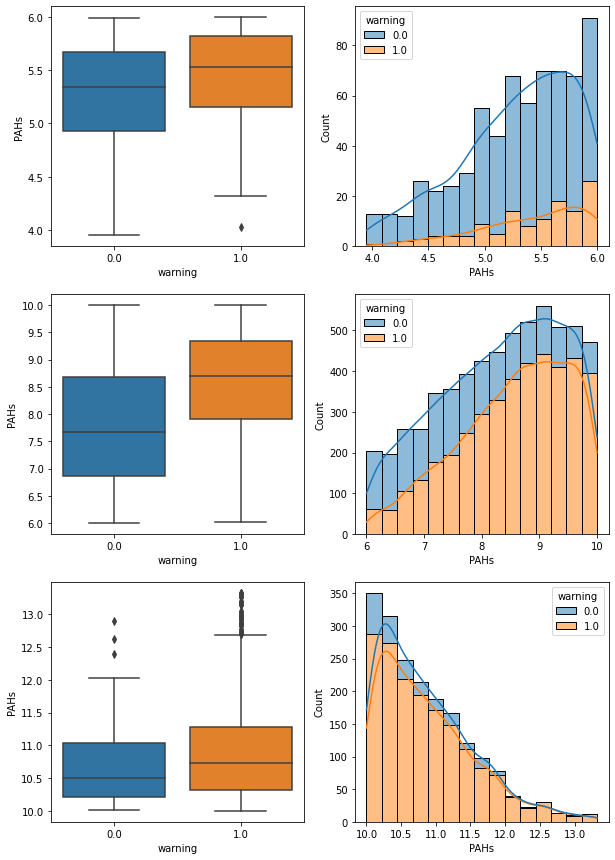

In [53]:
fig, axes = plt.subplots(3, 2, figsize = (10,15))

# Interval 0 - 6
sns.boxplot(PAHs0_6, y = 'PAHs', x = 'warning', ax = axes[0][0])
sns.histplot(data = PAHs0_6, ax = axes[0][1], stat = "count", multiple = "stack",
             x = "PAHs", bins = 15, hue = "warning", legend = True, kde = True)


# Interval 6 - 10
sns.boxplot(PAHs6_10, y = 'PAHs', x = 'warning', ax = axes[1][0])
sns.histplot(data = PAHs6_10, ax = axes[1][1], stat = "count", multiple = "stack",
             x = "PAHs", bins = 15, hue = "warning", legend = True, kde = True)


# Interval 10 - inf
sns.boxplot(PAHs10_inf, y = 'PAHs', x = 'warning', ax = axes[2][0])
sns.histplot(data = PAHs10_inf, ax = axes[2][1], stat = "count", multiple = "stack",
             x = "PAHs", bins = 15, hue = "warning", legend = True, kde = True)

From the boxplot we can see that values of *PAHs* when *warning* indicator equals 1 are generally higher (higher mean), nonetheless histograms shows us also increasing ratio of records with warning equal to 1. Further we make QQ-plots for each of the PAHs values intervals

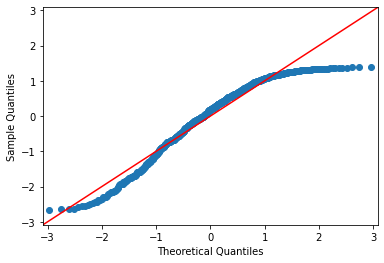

In [54]:
PAHs0_6_qq = sm.ProbPlot(PAHs0_6.PAHs, fit = True).qqplot(line = '45')

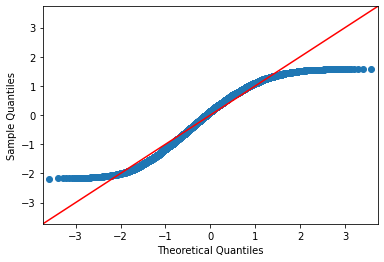

In [55]:
PAHs6_10_qq = sm.ProbPlot(PAHs6_10.PAHs, fit = True).qqplot(line = '45')

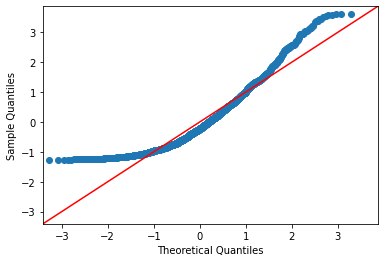

In [56]:
PAHs10_inf_qq = sm.ProbPlot(PAHs10_inf.PAHs, fit = True).qqplot(line = '45')

Based on the QQ-plots we can tell that these subsets do not come from normal distribution, but all 3 of subsets may come from similar ones. We can confirm that by using **Shapiro-Wilk test** on 1st subset.

Further in the hypothesis we however want to test only data where warning is set to 1, because we want to find out if there is any significant difference in PAHs values. Therefore we make next subsets containing only those records, where warning is set to 1.

In [57]:
PAHs0_6_warning1 = PAHs0_6[PAHs0_6['warning'] == 1]

PAHs0_6_warning1.describe()

,PAHs,warning
count,123.000000,123.0
mean,5.424205,1.0
std,0.466874,0.0
min,4.030740,1.0
25%,5.157555,1.0
50%,5.532870,1.0
75%,5.826275,1.0
max,5.997760,1.0


In [58]:
PAHs6_10_warning1 = PAHs6_10[PAHs6_10['warning'] == 1]

PAHs6_10_warning1.describe()

,PAHs,warning
count,4086.000000,4086.0
mean,8.556796,1.0
std,0.958830,0.0
min,6.014310,1.0
25%,7.909063,1.0
50%,8.697585,1.0
75%,9.341735,1.0
max,9.999700,1.0


In [59]:
PAHs10_inf_warning1 = PAHs10_inf[PAHs10_inf['warning'] == 1]

PAHs10_inf_warning1.describe()

,PAHs,warning
count,1684.000000,1684.0
mean,10.880905,1.0
std,0.689510,0.0
min,10.000370,1.0
25%,10.323690,1.0
50%,10.725305,1.0
75%,11.274490,1.0
max,13.325060,1.0


And again, we want to make new QQ-plots with only those records.

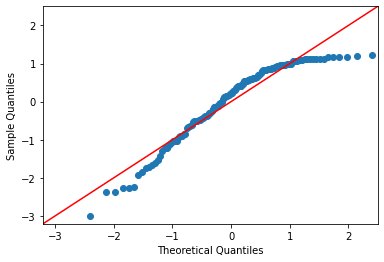

In [60]:
PAHs0_6_warning1_qq = sm.ProbPlot(PAHs0_6_warning1.PAHs, fit = True).qqplot(line = '45')

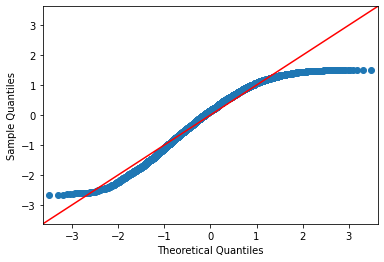

In [61]:
PAHs6_10_warning1_qq = sm.ProbPlot(PAHs6_10_warning1.PAHs, fit = True).qqplot(line = '45')

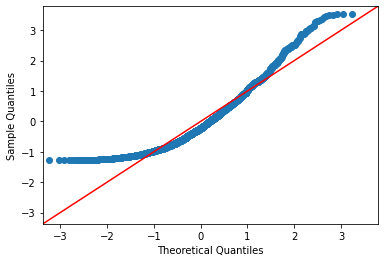

In [62]:
PAHs10_inf_warning1_qq = sm.ProbPlot(PAHs10_inf_warning1.PAHs, fit = True).qqplot(line = '45')

Curves of the distribution look similar for each of the subset, however there is lack of records in first subset and therefore we will use also **Shapiro-Wilk test of normality** to check if they come from normal distribution.

In [63]:
stats.shapiro(PAHs0_6_warning1.PAHs)

ShapiroResult(statistic=0.9161295890808105, pvalue=1.1140898550365819e-06)

In [64]:
stats.shapiro(PAHs6_10_warning1.PAHs)

ShapiroResult(statistic=0.9565946459770203, pvalue=2.9167252963495484e-33)

In [65]:
stats.shapiro(PAHs10_inf_warning1.PAHs)

ShapiroResult(statistic=0.9182054996490479, pvalue=2.941987990322749e-29)

All the p-value are lower than $\alpha$ = 0.05 and therefore we can reject H<sub>0</sub> of Shapiro-Wilk's test that these data come from normal distribution.

Because data do not come from normal distributions and we have several subsets, we will use non-parametric **Kruskal-Wallis H test**.

In [66]:
stats.kruskal(PAHs0_6_warning1.PAHs, PAHs6_10_warning1.PAHs, PAHs10_inf_warning1.PAHs)

KruskalResult(statistic=3790.4220859086145, pvalue=0.0)

P-value of conducted Kruskal test is 0.0 (that may be because of rounding float points). Because this value is lower than $\alpha$ = 0.05 we reject H<sub>0</sub> hypothesis of Kruskal-Wallis H-test and therefore we cannot reject our H<sub>0</sub> and can assume that there is a significant change in warning values between these intervals and thus between increasing PAHs values.